<a href="https://colab.research.google.com/github/TaeJeong-Park-dev/visual-AI/blob/master/%EC%8B%9C%EA%B0%81%EC%A7%80%EB%8A%A5%EC%9D%98_%EC%9D%B4%ED%95%B4_9%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms

In [5]:
mnist_test = dset.MNIST("", train=False, transform=transforms.ToTensor(),
                        target_transform=None, download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 53866619.39it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1632798.58it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 14150045.62it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3460586.52it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



mnist_test 길이:  10000
image data shape:  torch.Size([1, 28, 28])
label: 7


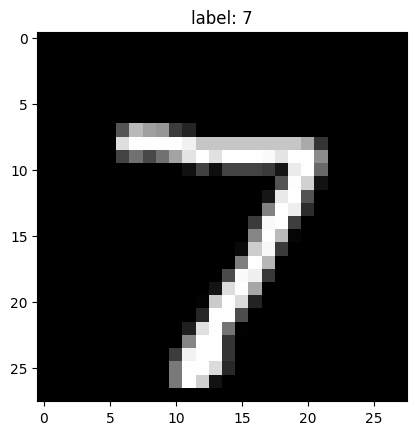

In [6]:
print("mnist_test 길이: ", len(mnist_test))

image, label = mnist_test.__getitem__(0)
print('image data shape: ', image.size())
print('label:', label)
img = image.numpy()
plt.title('label: %d' %label)
plt.imshow(img[0], cmap='gray')
plt.show()

In [18]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [8]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [9]:
class MyMLP:
  def __init__(self, n_input, n_hidden1, n_hidden2, n_output):
    self.W1 = np.zeros((n_hidden1, n_input), dtype = np.float32)
    self.b1 = np.zeros((n_hidden1,), dtype = np.float32)

    self.W2 = np.zeros((n_hidden2, n_hidden1), dtype = np.float32)
    self.b2 = np.zeros((n_hidden2,), dtype = np.float32)

    self.W3 = np.zeros((n_output, n_hidden2), dtype = np.float32)
    self.b3 = np.zeros((n_output,), dtype = np.float32)

  def __call__(self, x):
    x = x.reshape(-1)

    h1 = sigmoid(np.dot(self.W1, x) + self.b1)
    h2 = np.dot(self.W2, h1) + self.b2
    out = np.dot(self.W3, h2) + self.b3

    return softmax(out)


In [10]:
model = MyMLP(28*28, 256, 128, 10)

In [11]:
print(model.W1.shape, model.b1.shape)
print(model.W2.shape, model.b2.shape)
print(model.W3.shape, model.b3.shape)

(256, 784) (256,)
(128, 256) (128,)
(10, 128) (10,)


In [16]:
weights = np.load('./nets/mlp_weight.npz')
model.W1 = weights['W1']
model.b1 = weights['b1']
model.W2 = weights['W2']
model.b2 = weights['b2']
model.W3 = weights['W3']
model.b3 = weights['b3']

print(model.W1.shape, model.b1.shape)
print(model.W2.shape, model.b2.shape)
print(model.W3.shape, model.b3.shape)


(256, 784) (256,)
(128, 256) (128,)
(10, 128) (10,)


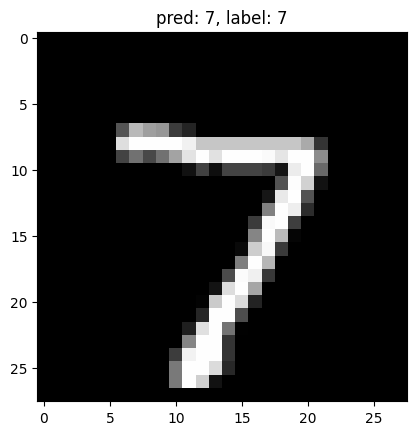

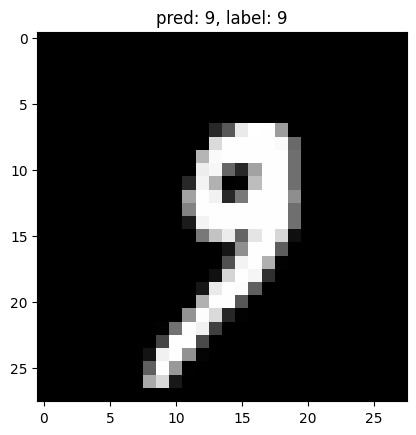

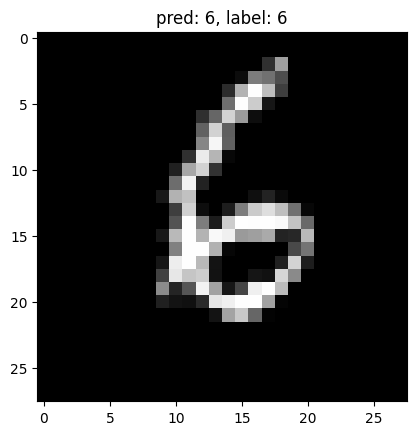

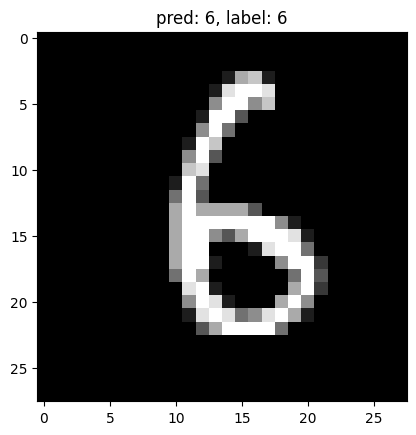

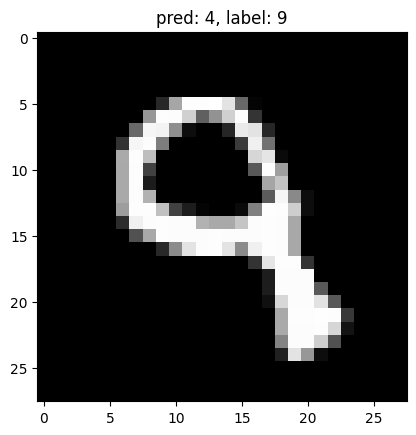

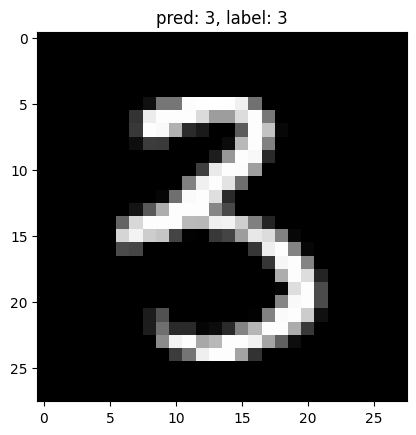

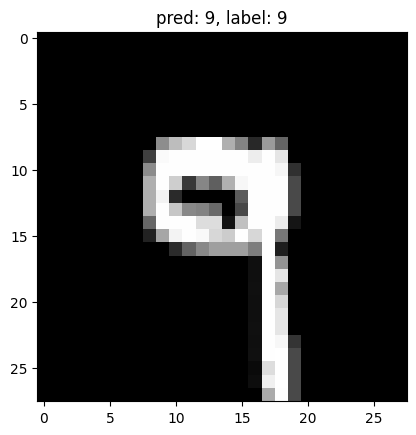

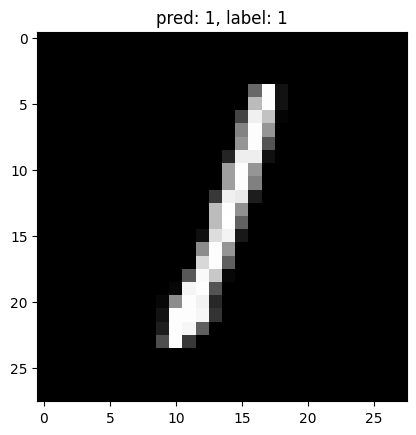

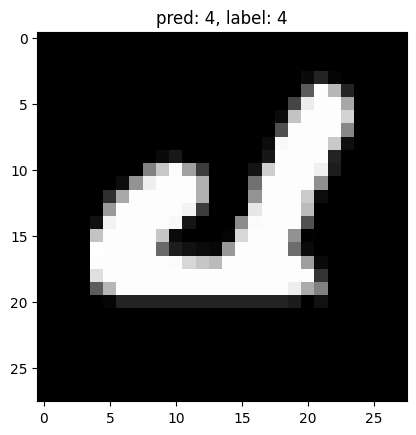

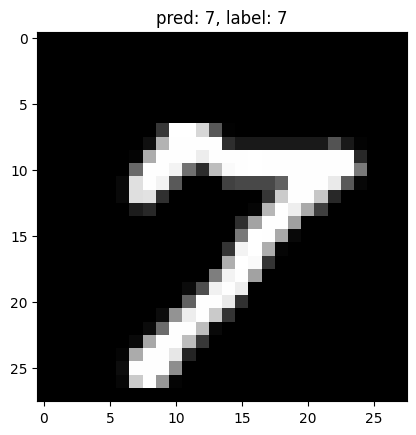

정확도: 91.91


In [24]:
mysum = 0

m = len(mnist_test)
cnt = 0
for i in range(m):
  image, label = mnist_test.__getitem__(i)
  output = model(image)

  if(i%1000 == 0):
    img = image.numpy()
    pred_label = np.argmax(output)
    plt.title('pred: %d, label: %d' %(pred_label, label))
    plt.imshow(img[0],cmap='gray')
    plt.show()

  cnt += 1
  mysum += (np.argmax(output) == label)
print('정확도: %.2f'%(float(float(mysum) / cnt) * 100.0))

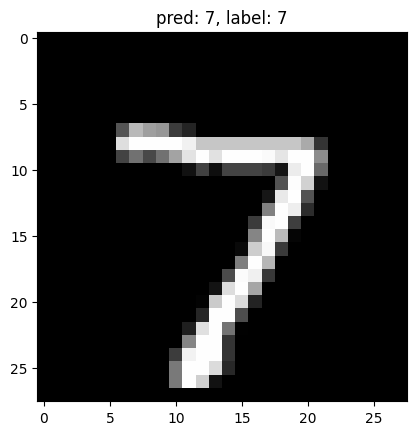

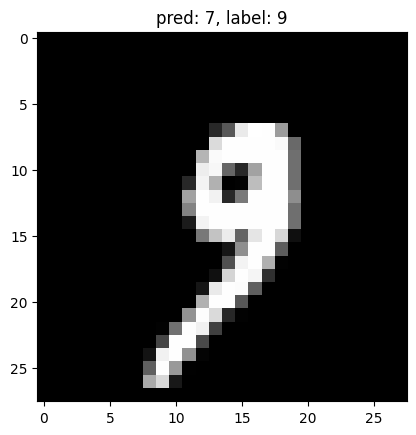

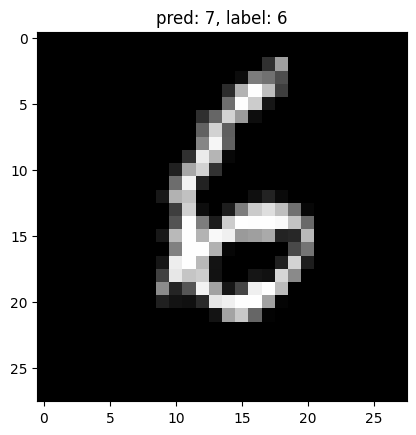

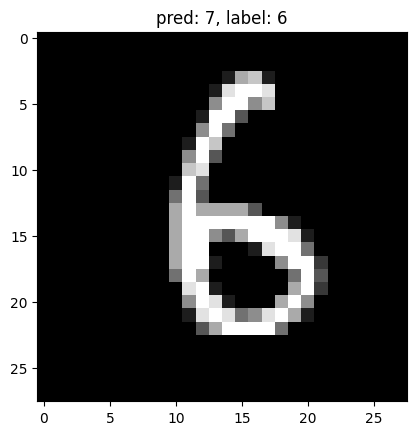

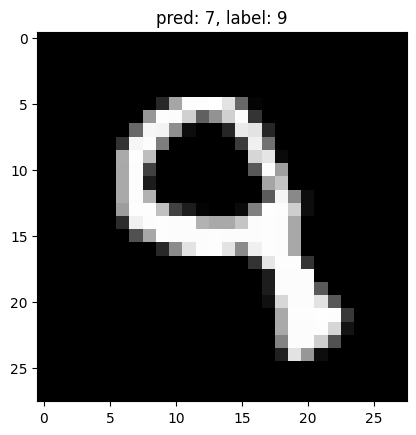

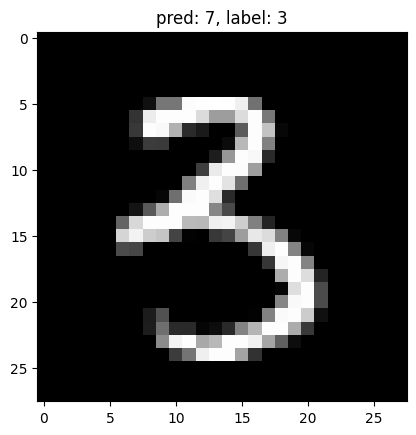

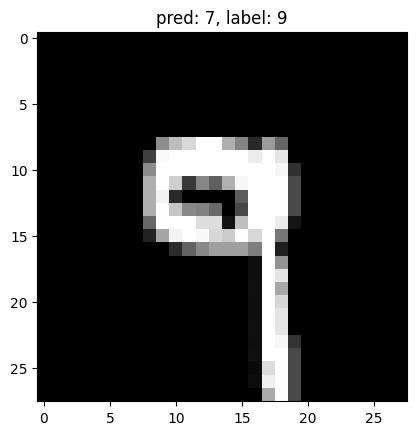

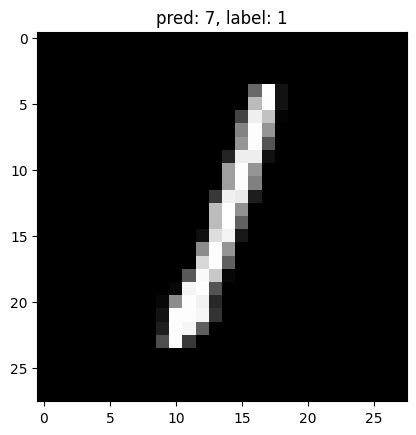

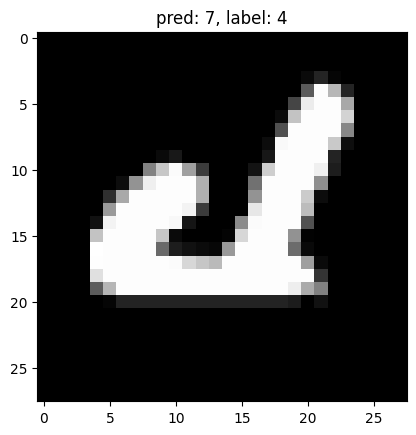

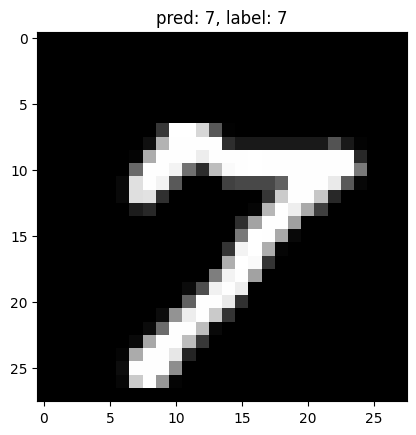

In [29]:
mysum = 0
m = len(mnist_test)
cnt = 0
for i in range(m):
  image, label = mnist_test.__getitem__(i)
  output = model(image)

  if(i%1000==0):
    img = image.numpy()
    pre_label = np.argmax(output)
    plt.title("pred: %d, label: %d" % (pred_label, label))
    plt.imshow(img[0], cmap='gray')
    plt.show()

  cnt += 1
  mysum += (np.argmax(output))